# Predicting the Highest Quality of Red Wine

When looking through the available datasets, one quickly stood out to me and I immediately began working with it. The UCI ML data repository has a popular dataset that tracks Wine Quality, specifically red and white vinho verde wine samples, from the north of Portugal. I am from Paso Robles, CA which is one of the best areas in the world that grows and produces wine, so I felt a strong desire to use this project to gain more insight on the wine industry and what qualities stand out in particular that make a high quality wine.

#### Source: https://archive.ics.uci.edu/dataset/186/wine+quality
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.


This dataset has the associated tasks of classification and regression, but for my project, I am mainly going to be focusing on a regression model. Also, as I prefer red wine to white wine, I am going to be focusing on just the red wine data to create my supervised learning model on.

In [99]:
#Going to be honest, I added way more packages than necessary because I was trying a lot of different approaches
#when making this project. I cleaned up and removed a lot of code blocks that I didn't end up using
#so there are some packages that are in this section that are never used in my submission. I couldn't be bothered to 
#figure out which ones need to be removed to make everything as clean as possible which is why there are so many
#random packages in this section.
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

## Main Model:

For this project, I wanted to compare several models to try and find the best fit. I end up working with Linear Regression, Support Vector Machines, Random Forests, and others to try and test as many possible models to present something interesting.

## Data:
As mentioned earlier, the data that I am using focuses on red wine quality. The data that is being measured are based on physicochemical test. Physicochemical tests are the standard to test wine because it measures apects of a wine that can be quantified.

Description of Qualities
* Alcohol: the amount of alcohol in wine
* Volatile acidity: acetic acid content which leading to an unpleasant vinegar taste
* Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
* Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
* Total Sulfur Dioxide: is the amount of SO2
* Density: sweeter wines have a higher density
* Chlorides: the amount of salt
* Fixed acidity: are non-volatile acids that do not evaporate easily
* pH: the level of acidity
* Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
* Residual sugar: is the amount of sugar remaining after fermentation stops. (Wines > 45g/ltrs are sweet)

In [100]:
redf = pd.read_csv("winequality-red.csv", sep = ';')
redf.columns = redf.columns.str.replace(" ", "_")
redf.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
redf.info()
redf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Description

There are 12 columns of data and 1299 entries that make up this data set. 

There are also no missing or null values which helps save a step when cleaning the data. The variable quality stands out as it is the only non-continuous variable. It is supposed to be a score between 1 and 10, but the only entries are betweeen 3 and 8.

### Data Cleaning

I hate to say it but there really wasn't a need to do any typical forms of data cleaning. There were no null or missing values which is great because that saves major step of the cleaning process. Also every feature was necessary to test which quality is the best for the wine so I felt dropping a feature would be counterintuitive to my overall project goal.

Later on in the project, I will transform the 'quality' variable to be binary to help with my models, but that is the major thing I changed in the dataset. 

I think one of the reasons this dataset is so popular is because how clean it is from the start. 

### Exploratory Data Analysis:

#### Figure 1: Histogram of Quality Score distribution
The first figure that I made was a quick histogram to see the spread of the wine quality scores. This was the target variable so exploring its distribution is important to understand as I was going through the process of this project. The results were very normally distributed with no outliers. The data had the ability to be ranked as any number between 1 and 10 so seeing that the max and min were significantly away from those scores were interesting to me. But no real outliers in the data which is great.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

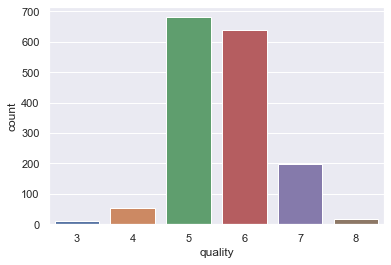

In [102]:
print(redf['quality'].value_counts())
sns.countplot(x='quality', data=redf)

#### Figure 2: Correlation Matrix
The correlation matrix provided me with some useful information as to which features have the highest correlation with quality so that I can focus on those in the future. Also provided some other useful information as to what other features are correlated with each other such as total sulfur dioxide with free sulfur dioxide or fixed acidity with density and citric acid.

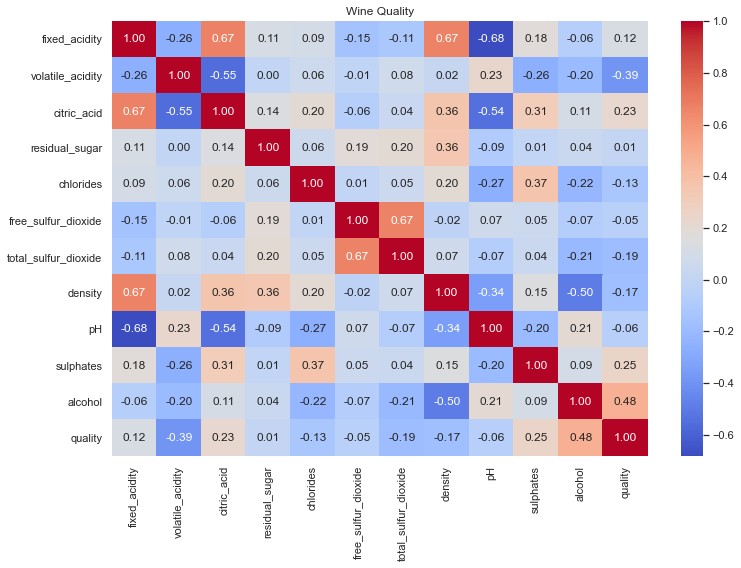

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


In [103]:
cm = redf.corr()
plt.figure(figsize = (12,8))
sns.heatmap(cm, cmap='coolwarm', annot=True, fmt = ".2f")
plt.title('Wine Quality')
plt.show()

correlation = redf.corr()['quality']
print(correlation.sort_values(ascending=False))

#### Figure 3: Some useful Box Plots
In this series of visualizations, I wanted to see the outliers for each of the wine features and to see the overall distribution. When viewing the 'quality' variable, there was a very normal distribution with no extreme outliers, but the other features show some heavily skewed histograms and some outliers that are extreme.

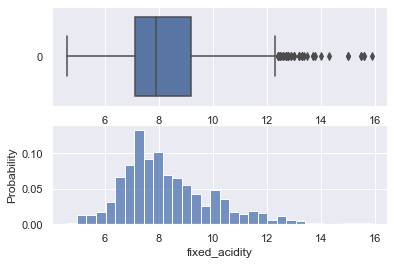

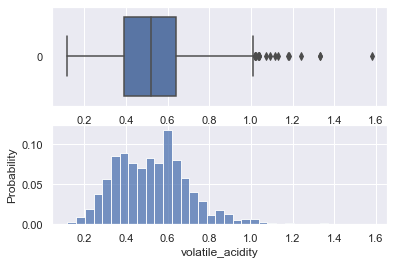

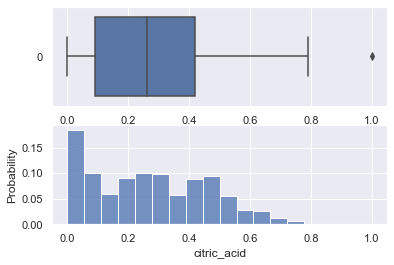

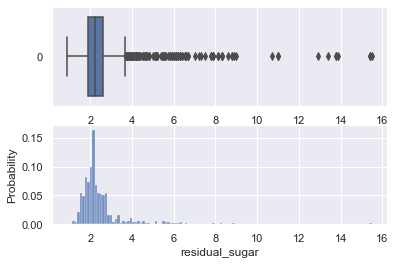

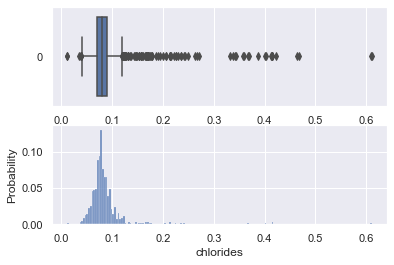

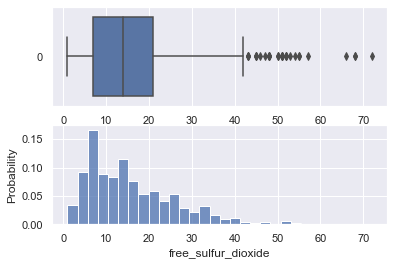

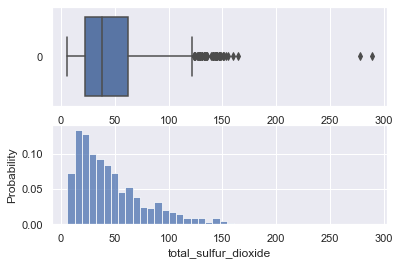

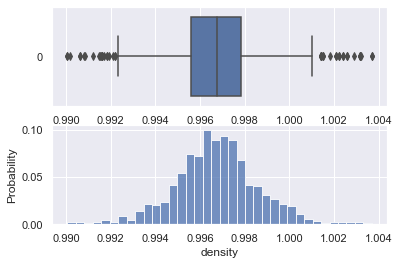

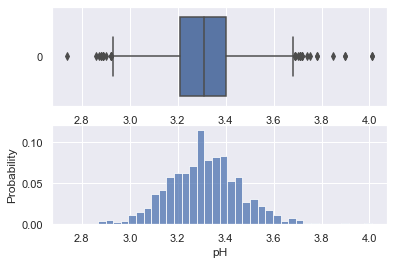

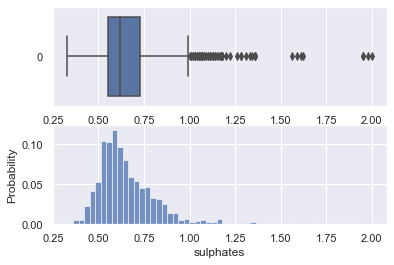

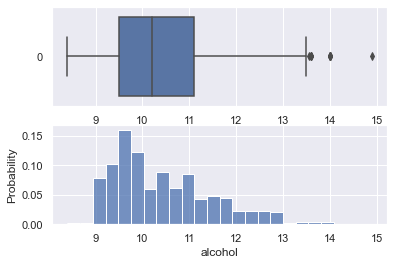

In [104]:
redX = redf.iloc[:,:-1]
redY = redf.iloc[:,-1]
for i in redX:
    _, (ax_box, ax_hist) = plt.subplots(2)
    sns.boxplot(data = redX[i], ax = ax_box, orient = 'h')
    sns.histplot(data = redX[i], ax = ax_hist, stat = 'probability')
    plt.show()

### Data Cleaning Pt. 2
As I am getting ready to work on the model, and after performing some data analysis, I decided it would be best to classify the wine quality in a binary form as good or bad. The goal is to create a model to predict good wine, so having a standard makes sense to set up.

In [105]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
redf['quality'] = pd.cut(redf['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
redf['quality'] = label_quality.fit_transform(redf['quality'])
redf.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [106]:
#setting the dependant and independant variables
Y = redf.quality
X = redf.drop('quality', axis=1)

#splitting and training the test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#scaling data to account for mean and standard deviation variations
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Models

I applied a lot of the models that we learned throughout the course. I also found learned about other models while I was working on this project that I thought would be interesting to add so I could have a lot of different models to compare.

In [109]:
def models(X_train,Y_train):
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #KNeighborsClassifier Method
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #SVC method
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #SVC with RBF
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #UNaïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #DecisionTreeClassifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8733385457388585
[1]K Nearest Neighbor Training Accuracy: 0.8983580922595777
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8537920250195465
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.893666927286943
[4]Naive Bayes Training Accuracy: 0.8358092259577795
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9906176700547302


C:\Users\rcoms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [110]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[277  13]
 [ 18  12]]
Model[0] Testing Accuracy = "0.903125 !"

[[276  14]
 [ 13  17]]
Model[1] Testing Accuracy = "0.915625 !"

[[290   0]
 [ 30   0]]
Model[2] Testing Accuracy = "0.90625 !"

[[285   5]
 [ 21   9]]
Model[3] Testing Accuracy = "0.91875 !"

[[240  50]
 [  6  24]]
Model[4] Testing Accuracy = "0.825 !"

[[270  20]
 [ 10  20]]
Model[5] Testing Accuracy = "0.90625 !"

[[278  12]
 [ 12  18]]
Model[6] Testing Accuracy = "0.925 !"



C:\Users\rcoms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rcoms\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Results and Analysis

Finally adding in a confusion matrix to see the testing accuracy for the various models. What we see is the Random Forest does the best job at actually predicting the quality wines. Even though some of the other models predictred more good wines, the Random forest made fewer errors with False Positives. 

To expand further on that topic, we see the Support Vector Machine (Linear Classifier) Model have an extremely high testing accuracy of over 90%, but that information is fairly useless because it flagged every wine as bad when there were 30 that were good. And if the goal is to help predict the good wines, declaring every test as fail is useless information.

## Conclusion

In all, I am happy with the results of this project. If I am going to be honest, I still feel like I am lost on the topic of supervised learning, but I do feel I was able to learn a lot from the lectures, practicing with the programming assignments, and some learning on my own. 

If I were to expand on this project, I would proabably like to include both datasets. Or to work with a data set that needs to be cleaned. I really enjoyed working on the parts of the assignment that were before the testing and training and then it became really confusing for me.